In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd

from tools import kaczmarz_method

plt.rcParams.update({
    "text.usetex": True
})

In [2]:
# making a vector x sparse with s non zero entries
def sparse(x, s):
  shape = x.shape

  arr = np.zeros(shape)
  arr[:s]  = 1
  np.random.shuffle(arr)
  return x * arr

In [3]:
#@title : Create the toy example

m = 200  # number of equations
n = 100  # number of unknowns
s = 10 # number of nonzeros in solution

lambda_rsk = 1 # sparsity parameter, coefficient of 1-norm

random.seed(127)
A = np.random.randn(m,n)

# create a sparse solution with s non zero entries
x_true = sparse(np.random.randn(n,1),s)

b = A @ x_true

sigma = 0.1*np.linalg.norm(b) # 10% noise

print(A.shape, x_true.shape, b.shape, s)

(200, 100) (100, 1) (200, 1) 10


In [4]:
#@title : Hyperparameters Tuning by search over list of gammas

gamma_list = np.logspace(0,-4,30)
l_rate = 'oss'

x_0 = np.zeros((n, 1))

block_numbers = [200, 100, 20, 5, 1]
epochs = 50
Data = []

for blc_nber in block_numbers:
    for gma in gamma_list:

        max_iter = epochs*blc_nber
        x_0 = np.zeros((n, 1))
        sgma_list = [sigma/(np.sqrt(blc_nber)) for _ in range(blc_nber)]
        Result = kaczmarz_method(A, x_0, b, x_true, max_iter, sgma_list, gma, lbda=lambda_rsk, nber_block=blc_nber, p_list=[], save_freq=1, lr = l_rate)

        data_results = dict()
        data_results['step_size'] = l_rate
        data_results['gamma'] = gma
        data_results['lambda'] = lambda_rsk
        data_results['number_block'] = blc_nber
        data_results['error'] = Result[2][-1]
        data_results['residual'] = Result[1][-1]

        Data.append(data_results)

Computing beta_0 for lambda=1
Algorithm 1 : stepsize oss = Optimal stepsize, M = 200, shuffle = False, gamma = 1.0, lambda = 1 for 10000 iterations
Computing beta_0 for lambda=1
Algorithm 1 : stepsize oss = Optimal stepsize, M = 200, shuffle = False, gamma = 0.7278953843983151, lambda = 1 for 10000 iterations
Computing beta_0 for lambda=1
Algorithm 1 : stepsize oss = Optimal stepsize, M = 200, shuffle = False, gamma = 0.5298316906283709, lambda = 1 for 10000 iterations
Computing beta_0 for lambda=1
Algorithm 1 : stepsize oss = Optimal stepsize, M = 200, shuffle = False, gamma = 0.3856620421163472, lambda = 1 for 10000 iterations
Computing beta_0 for lambda=1
Algorithm 1 : stepsize oss = Optimal stepsize, M = 200, shuffle = False, gamma = 0.2807216203941177, lambda = 1 for 10000 iterations
Computing beta_0 for lambda=1
Algorithm 1 : stepsize oss = Optimal stepsize, M = 200, shuffle = False, gamma = 0.20433597178569418, lambda = 1 for 10000 iterations
Computing beta_0 for lambda=1
Algori

In [5]:
df = pd.DataFrame.from_dict(Data)
df

df[df['error'] == min(df['error'])]

df200 = df[df['number_block'] == 200]
Gamma_200 = (df200[df200['error'] == min(df200['error'])]['gamma']).iloc[0]
print(Gamma_200)
print(df200[df200['error'] == min(df200['error'])])

df100 = df[df['number_block'] == 100]
Gamma_100 = (df100[df100['error'] == min(df100['error'])]['gamma']).iloc[0]
print(Gamma_100)
print(df100[df100['error'] == min(df100['error'])])

df20 = df[df['number_block'] == 20]
Gamma_20 = (df20[df20['error'] == min(df20['error'])]['gamma']).iloc[0]
print(Gamma_20)
print(df20[df20['error'] == min(df20['error'])])

df5 = df[df['number_block'] == 5]
Gamma_5 = (df5[df5['error'] == min(df5['error'])]['gamma']).iloc[0]
print(Gamma_5)
print(df5[df5['error'] == min(df5['error'])])

df1 = df[df['number_block'] == 1]
Gamma_1 = (df1[df1['error'] == min(df1['error'])]['gamma']).iloc[0]
print(Gamma_1)
print(df1[df1['error'] == min(df1['error'])])

0.01610262027560939
   step_size     gamma  lambda  number_block    error  residual
13       oss  0.016103       1           200  0.00271  0.003199
0.008531678524172805
   step_size     gamma  lambda  number_block     error  residual
45       oss  0.008532       1           100  0.002692  0.003138
0.07880462815669913
   step_size     gamma  lambda  number_block     error  residual
68       oss  0.078805       1            20  0.003753  0.004105
0.14873521072935114
   step_size     gamma  lambda  number_block     error  residual
96       oss  0.148735       1             5  0.003336  0.003643
0.011721022975334805
    step_size     gamma  lambda  number_block     error  residual
134       oss  0.011721       1             1  0.003371  0.003866


In [6]:
#@title : Run with optimized gammas for more epochs

block_numbers = [200, 100, 20, 5, 1] #[m, int(m/10), int(m/100), int(m/1000), int(m/m)] #[m, int(m/10), int(m/100), int(m/1000), int(m/m)]
Gammas = [Gamma_200, Gamma_100, Gamma_20, Gamma_5, Gamma_1]
epochs = 400

Errors = dict()
Residuals = dict()
Results = dict()

for blc_nber in block_numbers:
  Results[blc_nber] = dict()

for k in range(len(block_numbers)):
  max_iter = epochs*block_numbers[k]
  x_0 = np.zeros((n, 1))
  sgma_list = [sigma/(np.sqrt(block_numbers[k])) for _ in range(block_numbers[k])]
  x, residuals, errors, eta_values, beta_values = kaczmarz_method(A, x_0, b, x_true, max_iter, sgma_list, Gammas[k],
                                                                 lbda=lambda_rsk, nber_block=block_numbers[k], p_list=[], lr = 'oss')
  Results[block_numbers[k]]['error'] = errors
  Results[block_numbers[k]]['residual'] = residuals
  Results[block_numbers[k]]['beta'] = beta_values
  Results[block_numbers[k]]['eta'] = eta_values

Computing beta_0 for lambda=1
Algorithm 1 : stepsize oss = Optimal stepsize, M = 200, shuffle = False, gamma = 0.01610262027560939, lambda = 1 for 80000 iterations
Computing beta_0 for lambda=1
Algorithm 1 : stepsize oss = Optimal stepsize, M = 100, shuffle = False, gamma = 0.008531678524172805, lambda = 1 for 40000 iterations
Computing beta_0 for lambda=1
Algorithm 1 : stepsize oss = Optimal stepsize, M = 20, shuffle = False, gamma = 0.07880462815669913, lambda = 1 for 8000 iterations
Computing beta_0 for lambda=1
Algorithm 1 : stepsize oss = Optimal stepsize, M = 5, shuffle = False, gamma = 0.14873521072935114, lambda = 1 for 2000 iterations
Computing beta_0 for lambda=1
Algorithm 1 : stepsize oss = Optimal stepsize, M = 1, shuffle = False, gamma = 0.011721022975334805, lambda = 1 for 400 iterations


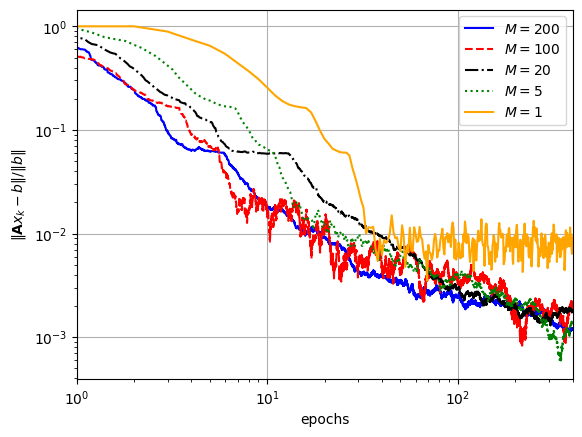

In [7]:
#@title : Residuals plots

linestyles = ['solid','dashed', '-.', 'dotted', 'solid','dashed', '-.']
colors = ['blue', 'red', 'black', 'green', 'orange','brown']

plt.grid(True)

for k in range(len(block_numbers)):
  plt.loglog(np.arange(epochs*block_numbers[k]+1)/block_numbers[k],Results[block_numbers[k]]['residual'], linestyle=linestyles[k], label= '$M' + f'={block_numbers[k]}$', color=colors[k])

plt.xlabel(r'epochs')
plt.ylabel('$\|\mathbf{A}x_k - b\|/\|b\|$')
plt.xlim(1,400)
plt.legend()
# plt.savefig('../figures/blocks_residuals_{}_{}.pdf'.format(m,n), format='pdf')
plt.show()

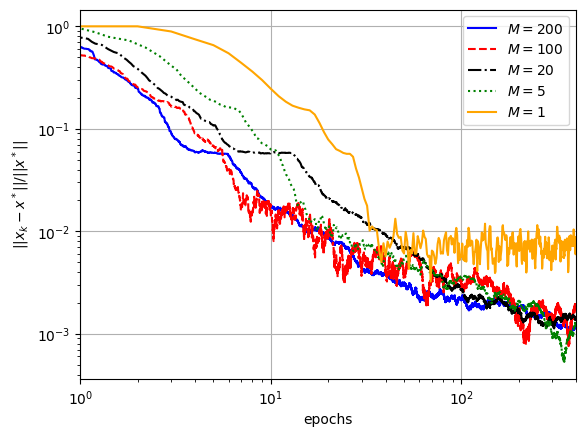

In [8]:
#@title : Errors plots

linestyles = ['solid','dashed', '-.', 'dotted', 'solid','dashed', '-.']
colors = ['blue', 'red', 'black', 'green', 'orange']

plt.grid(True)

for k in range(len(block_numbers)):
  plt.loglog(np.arange(epochs*block_numbers[k]+1)/block_numbers[k],Results[block_numbers[k]]['error'], linestyle=linestyles[k], label= '$M' + f'={block_numbers[k]}$', color=colors[k])

plt.xlabel(r'epochs')
plt.ylabel('$||x_k - x^*||/||x^*||$')
plt.xlim(1,400)
plt.legend()
# plt.savefig('../figures/blocks_errors_{}_{}.pdf'.format(m,n), format='pdf')
plt.show()